<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
       
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">Insights on edX course data </h1>
        <div style="width: 100%; text-align: center; display: inline-block;"><i>Author:</i> <strong>Aswin.P</strong> </div>
        <div style="width: 100%; text-align: center; display: inline-block;">
            <i>Created: </i>
            <time datetime="2017-05-26" pubdate>May,26,2017</time>
        </div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 50%; display: inline-block; text-align: right;">
    </div>
    </div>
</div>


## Introduction
The main aim of this notebook is to:
1. To find what are the subjects and courses that are the most popular on the edX platform
2. Obtain any further insights from the data


## 1. Loading Packages, Setting Directories,Reading Data:

In [8]:
# Installation part:
#install.packages("lubridate")
#install.packages("reshape2")
#install.packages("gridExtra")
#install.packages("dplyr")
#install.packages("reconstructr")
#install.packages("ggplot2")
#install.packagesckages("grid")
#install.packages("gridExtra")
#install.packages("scales")
#install.packages("VIM")
#install.packages("stringi")
#install.packages("waffle")
#install.packages("ggrepel")
#install.packages("forcats")
#install.packages("scales")

# Loading part:
suppressWarnings(suppressMessages(library(lubridate)))
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(reshape2)))
#suppressWarnings(suppressMessages(library(reconstructr)))
suppressWarnings(suppressMessages(library(gridExtra)))
suppressWarnings(suppressMessages(library(ggplot2)))
suppressWarnings(suppressMessages(library(grid)))
suppressWarnings(suppressMessages(library(gridExtra)))
suppressWarnings(suppressMessages(library(scales)))
#suppressWarnings(suppressMessages(library(VIM)))
#suppressWarnings(suppressMessages(library(stringi))) 
#suppressWarnings(suppressMessages(library(waffle)))
#suppressWarnings(suppressMessages(library(ggrepel)))
#suppressWarnings(suppressMessages(library(scales)))
#suppressWarnings(suppressMessages(library(forcats)))
                      
# setting directories:
setwd("C:/Users/Aswin/Desktop/Grabon")
#getwd()

# Reading data:
test_data <- read.csv("data_science_task_test_data.csv",stringsAsFactors = FALSE)

## 2. Data View and Cleaning of Columns:

The data has <b>*290 rows*</b> and <b>*23 columns.*</b>

The course data has the following columns:

* Institution- Institution that offers the course
* Course number- A number that is provided for each course title
* Launch date- The date at which the course was launched
* Course title- The name of the course
* Instructors- The insturctor/s for the course
* Course subject- The main subject under which the course falls
* Year- since the course started
* Honor code certificates- Whether the course has an Honor code certificate or not.
* Participants (Course Content Accessed)- Participants of the course who accessed the course content.
* Audited (> 50% Course Content Accessed)- Participants who audited the course
* Certified- Participants hwo received final certification
* % Audited- Percentage of participants who audited the course
* % Certified-  Percentage of participants who got certified in the course
* % Certified of > 50% Course Content Accessed- Percentage of particiants who got certified and also have accessed >50% of the course content
* % Played Video- Percentage of participants who played the video
* % Posted in Forum- Percentage of participants who posted in forum discussions
* % Grade Higher Than Zero- Percentage of participants who got a grade higher than zero
* Total Course Hours (Thousands)- Total hours participants spent learning
* Median Hours for Certification- Median hours of the participants who got certification
* Median Age- Median age of the participants
* % Male- Percantage of male participants
* % Female- Percantage of female participants
* % Bachelor's Degree or Higher- Percantage of participants who had a Bachelor's degree or higher

In [9]:
## Data cleaning-
# Find if there are any missing values, character spaces, special characters in the data:

# cleaning the values for speacial character "---" in X..Played.Video and replacing with NA
test_data$X..Played.Video <- ifelse(test_data$X..Played.Video=='---',NA,test_data$X..Played.Video)

# replacing the blank instructor values with NA
test_data$Instructors <- ifelse(test_data$Instructors=="",NA,test_data$Instructors)

# searching for NA values
#sapply(test_data, function(x) sum(is.na(x)))

# displaying the courses that have those missing values 
print("Courses with missing values for % played video")
test_data$Course.Title[is.na(test_data$X..Played.Video)]
print("Courses with missing values for Instructors")
test_data$Course.Title[is.na(test_data$Instructors)] 

[1] "Courses with missing values for % played video"


[1] "Justice"

[1] "Courses with missing values for Instructors"


[1] "Introduction to Computer Science (2016)"

###### Note:

Since only two entries out of 290 rows, there is no treatment needed. If they come up significant in the EDA, we can take decisions based on the columns that we will be using.

## 3. Most popular subjects and courses:
### 3.a Popular subjects-

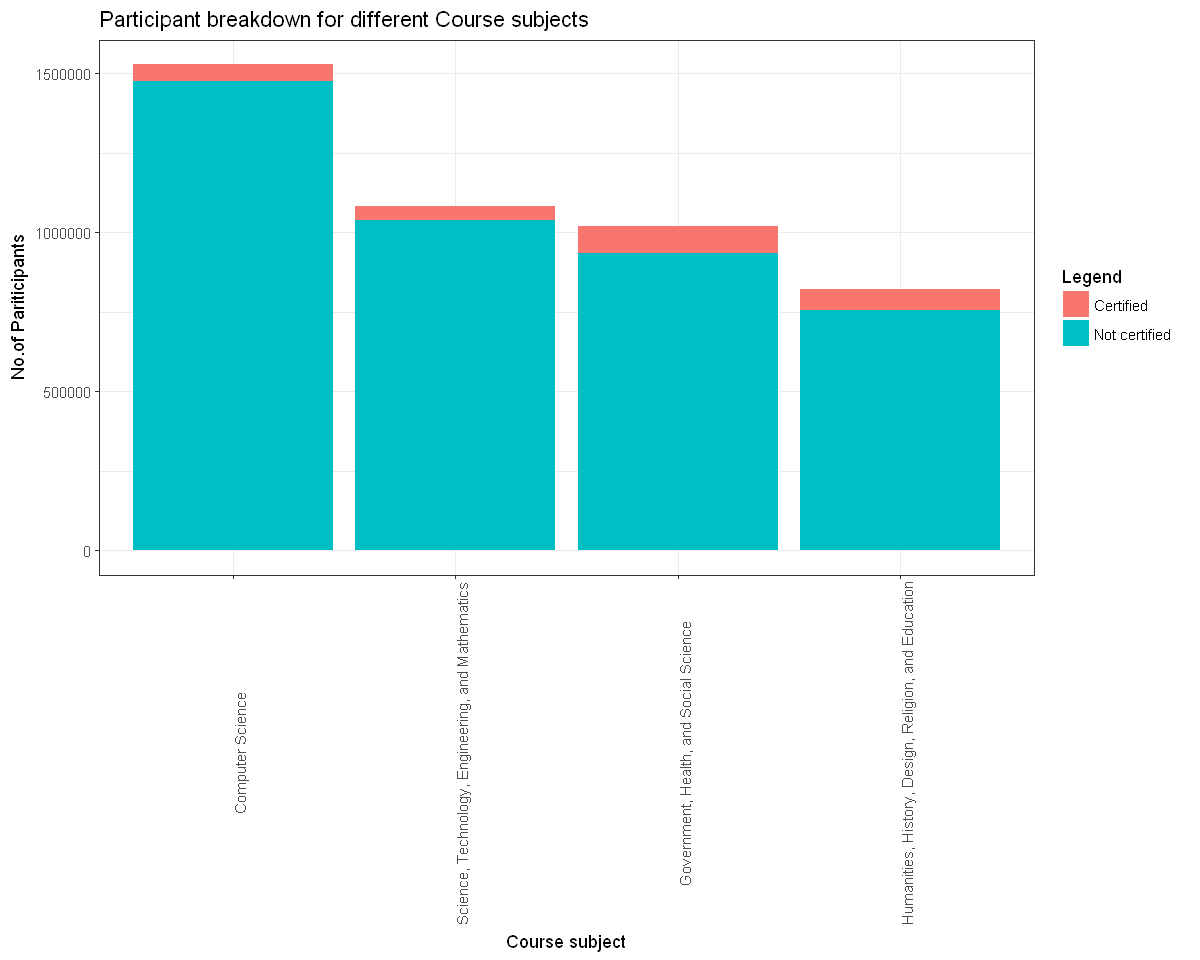

In [10]:
### Popular subjects:
 
subject <- test_data %>% group_by(Course.Subject) %>% 
  summarise(Participants=sum(Participants..Course.Content.Accessed.),Passed=sum(Certified) )

# creating flags for certified and non-certitifed particiants:

subject$flag <- "Certified"
subject1 <- subject
subject1$Passed <- subject1$Participants-subject1$Passed
subject1$flag <- "Not certified"
subject <- rbind(subject,subject1)
names(subject$Passed) <- "Count"

# plot
# Change plot size to 8 x 3
options(repr.plot.width=10, repr.plot.height=8)

ggplot(data = subject, aes(x = reorder(Course.Subject,-Participants), y = Passed, fill = flag)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_bw() + 
  xlab("Course subject") + 
  ylab("No.of Pariticipants")  +
  scale_fill_discrete(name="Legend") +
  ggtitle("Participant breakdown for different Course subjects") +
  theme(axis.text.x = element_text(angle=90)) 


<div class="alert alert-success">
<font color=blue>
<b>
Insight-
<br>
<br>
Most popular subject is Computer science, followed by Science, Technology,Engineering and Mathematics.But, the percentage of participants who get the final certification is higher in Government,Health and Social science, than other subjects.
<br>
</b>
</font>
</div>

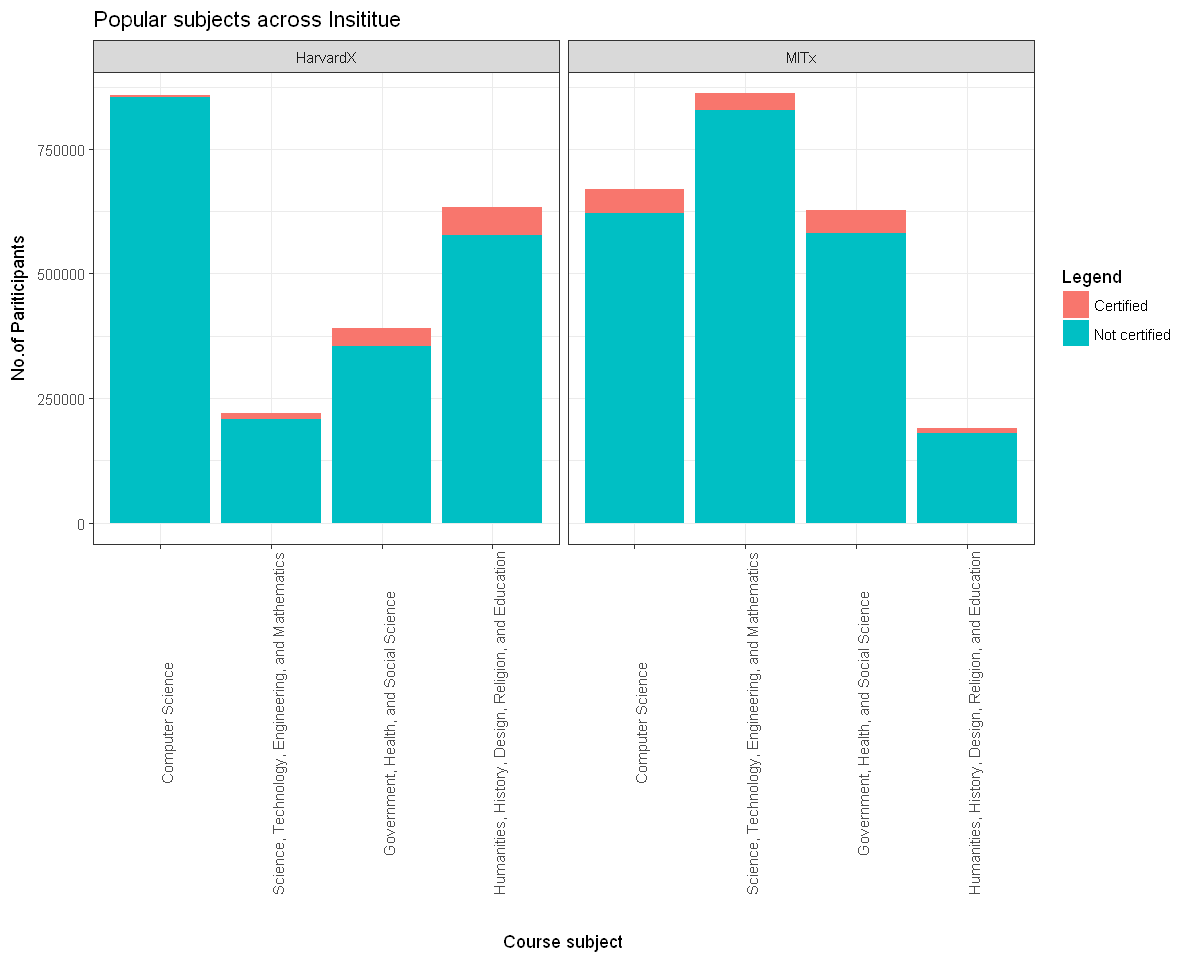

In [11]:
### popular subjects for each institution:

subject <- test_data %>% group_by(Course.Subject,Institution) %>% 
  summarise(Participants=sum(Participants..Course.Content.Accessed.),Passed=sum(Certified) )

# creating flags for certified and non-certitifed particiants:

subject$flag <- "Certified"
subject1 <- subject
subject1$Passed <- subject1$Participants-subject1$Passed
subject1$flag <- "Not certified"
subject <- rbind(subject,subject1)
names(subject$Passed) <- "Count"

# plot
# Change plot size to 8 x 3
options(repr.plot.width=10, repr.plot.height=8)

ggplot(data = subject, aes(x = reorder(Course.Subject,-Participants), y = Passed, fill = flag)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_bw() + 
  xlab("Course subject") + 
  ylab("No.of Pariticipants")  +
  scale_fill_discrete(name="Legend") +
  ggtitle("Popular subjects across Insititue") +
  theme(axis.text.x = element_text(angle=90)) +
  facet_wrap(~Institution)  


<div class="alert alert-success">
<font color=blue>
<b>
Insight-
<br>
<br>
While people prefer <b>HardvardX</b> for courses on <b>Computer science and Humanities,History,design,Religion,Education</b>, they prefer <b>MITX</b> for courses on <b>Science, Technnology,Methematics,Engineering and Government,Health,social science</b>.
<br>
</b>
</font>
</div>

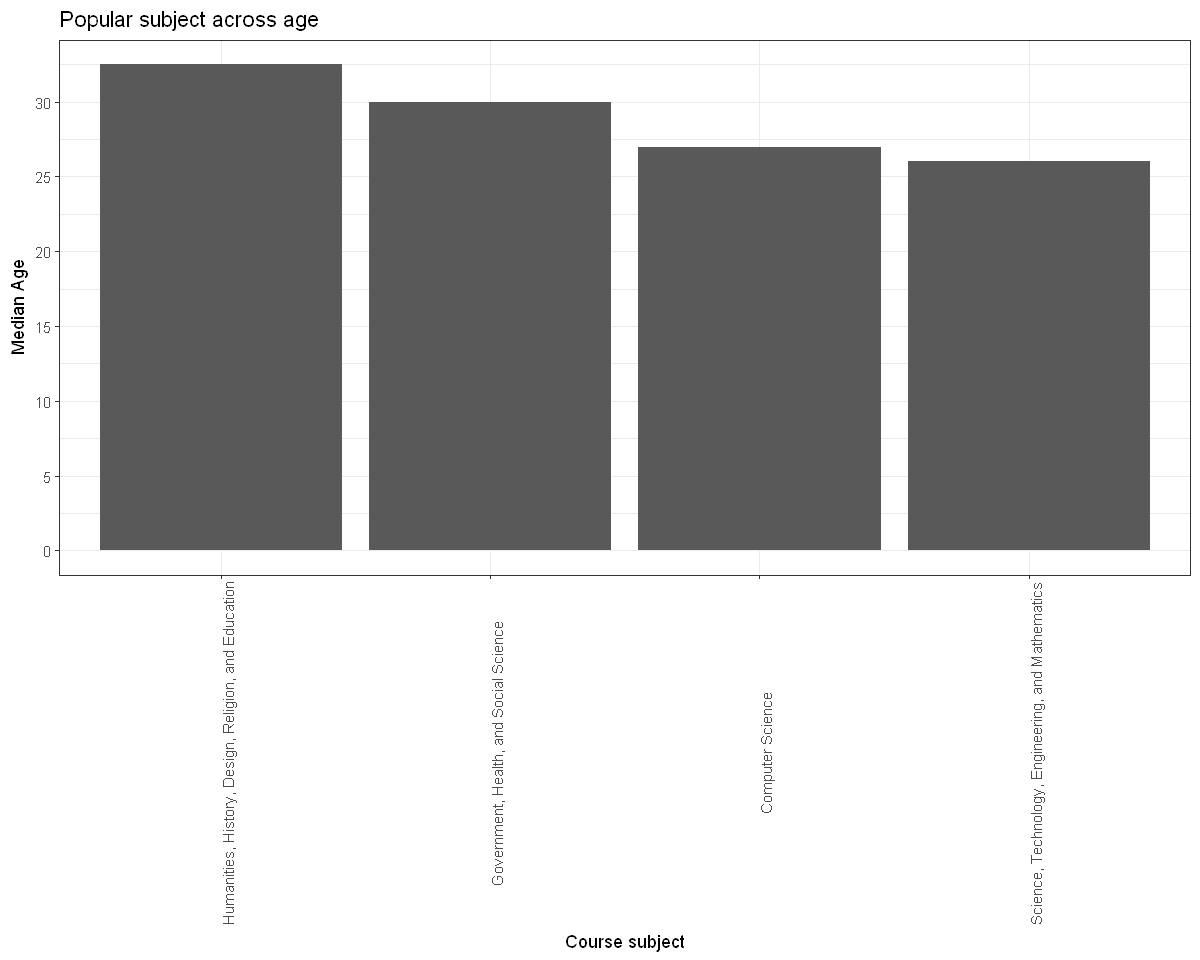

In [12]:
# age distribution for different subjects:

age <- test_data %>% group_by(Course.Subject) %>% summarise(Age = median(Median.Age))

ggplot(data = age, aes(x = reorder(Course.Subject,-Age), y = Age)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_bw() + 
  xlab("Course subject") + 
  ylab("Median Age") +
  ggtitle("Popular subject across age") +
  theme(axis.text.x = element_text(angle=90)) +
  scale_y_continuous(breaks=scales::pretty_breaks(n=10))

<div class="alert alert-success">
<font color=blue>
<b>
Insight-
<br>
<br>
While people of age <b> Thirty and Above </b> generally prefer subjects related to <b>Humanities, History, Education,Government,Health and social science</b>, those <b> below Thirty </b> generally prefer Computer science, Science and Technology based courses.
<br>
</b>
</font>
</div>

### 3.b Popular courses-
###### Note:

There are some courses, that have the same Course title, but different "Instructors","Launch date" or "Years". This might mean that they are the same courses, but have been revamped/resturcutred/restaffed and released again. For inital analysis purposes, we consider these courses to be one. 

Also, there is a case where a course is named <b>"Mechanics ReView"</b> and <b>"Mechanics Review</b>, which are essentially both the same. They are also considered to be one course.

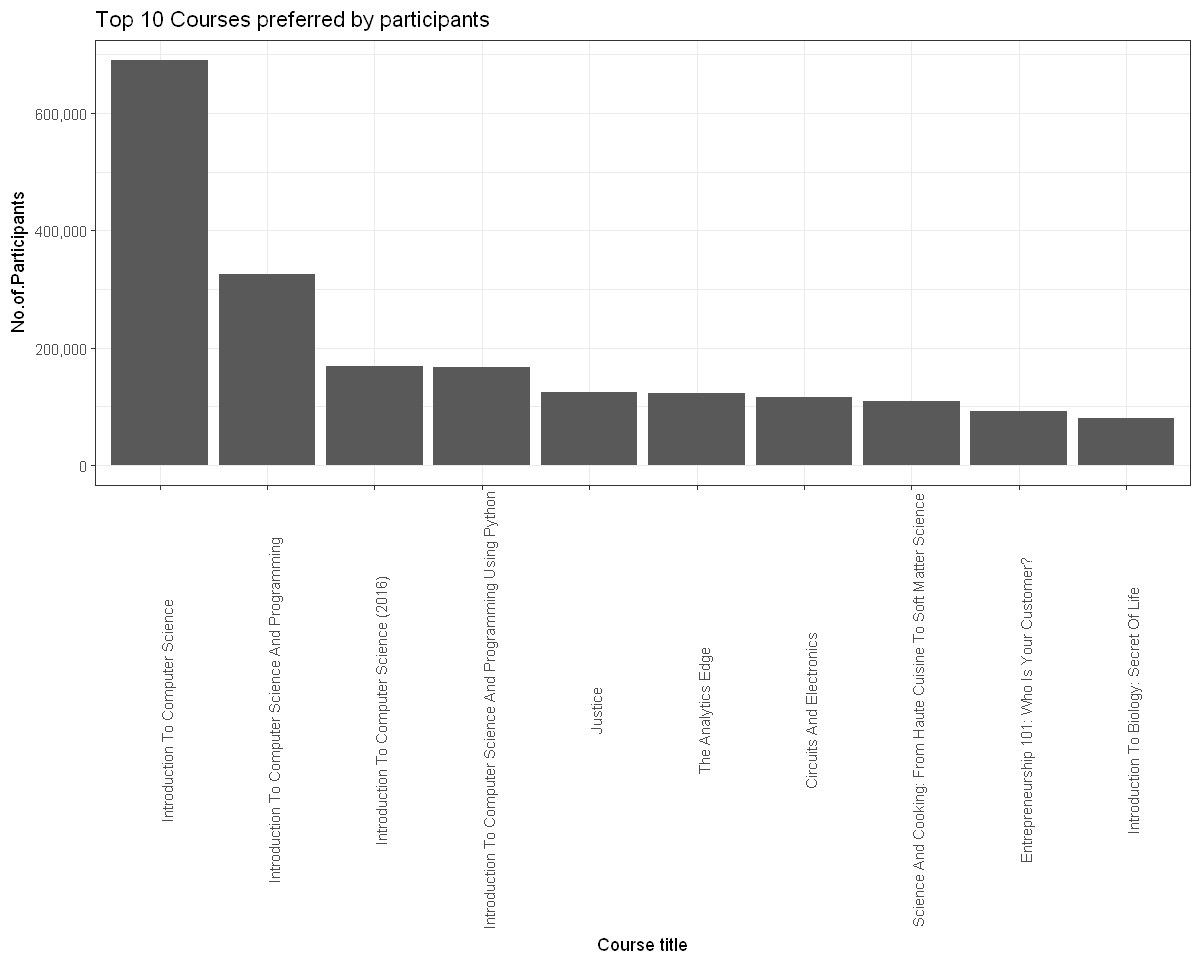

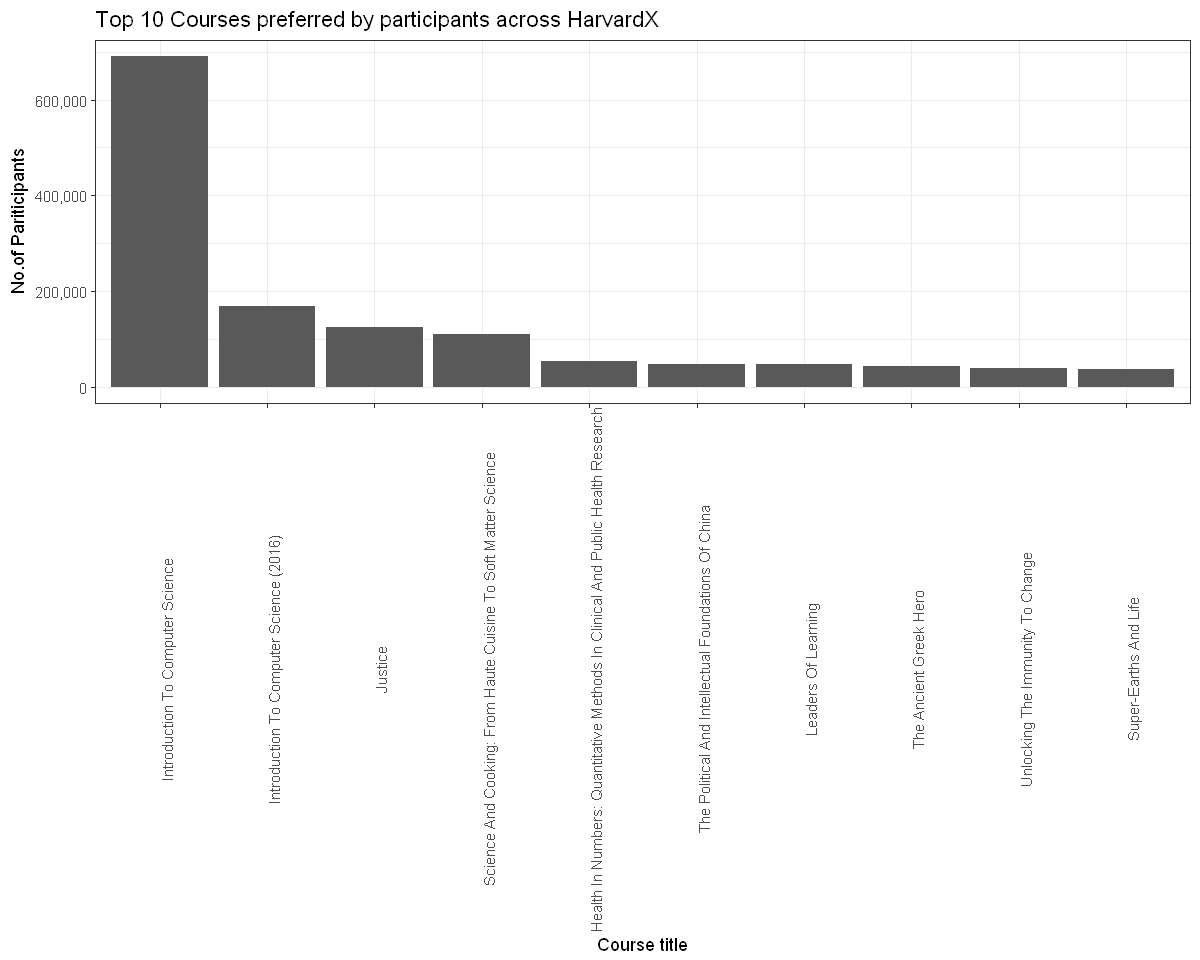

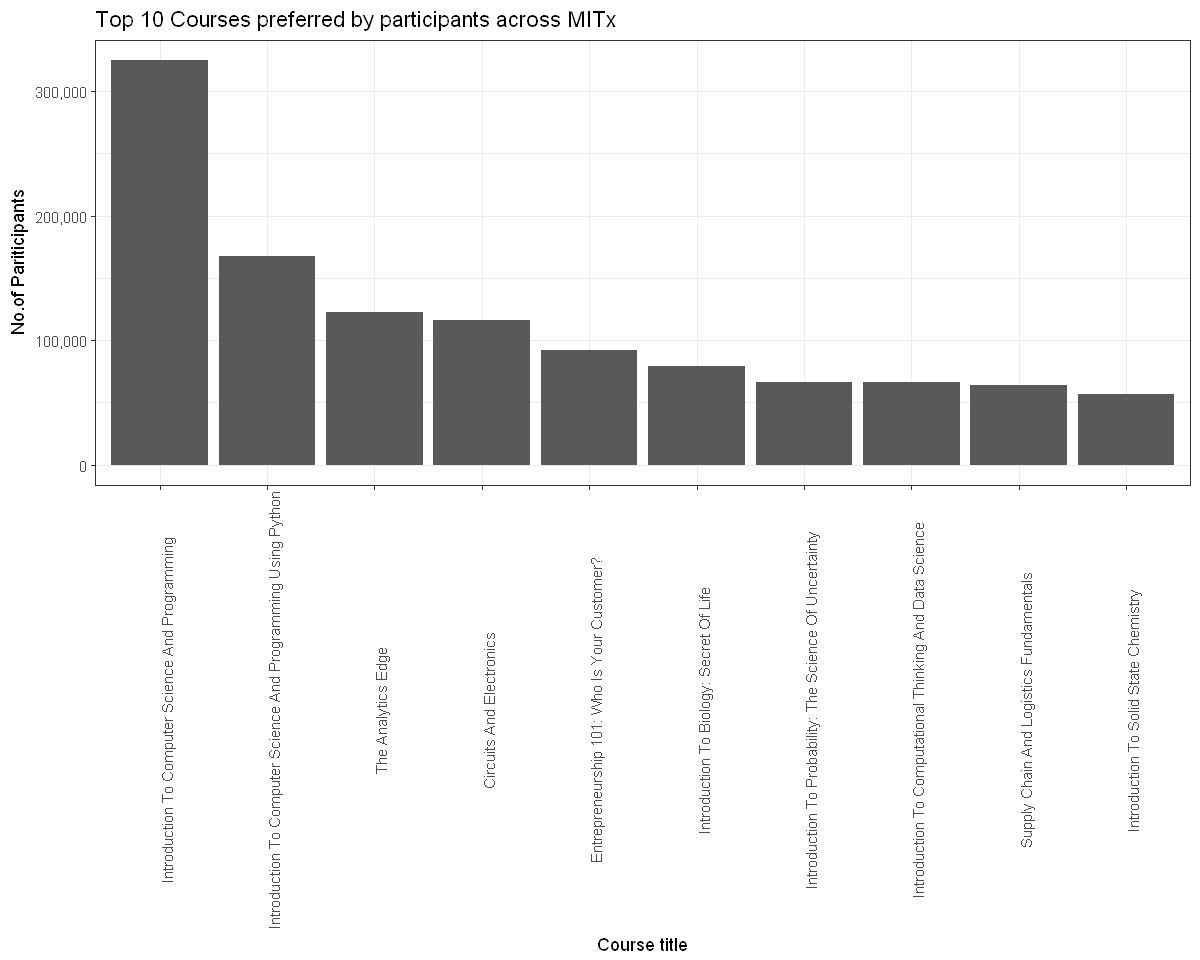

In [13]:
### popular courses- 

course <- test_data %>%
  group_by(Course.Title = stringi::stri_trans_totitle(Course.Title))
course <- course %>% group_by(Course.Title) %>% 
  summarise(Participants= sum(Participants..Course.Content.Accessed.),Passed=sum(Certified))  %>%
  arrange(desc(Participants))

# plot- top 10 courses:
ggplot(data = course[1:10,], aes(x = reorder(Course.Title,-Participants), y = Participants)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_bw() + 
  xlab("Course title") + 
  ylab("No.of.Participants") +
  ggtitle("Top 10 Courses preferred by participants") +
  theme(axis.text.x = element_text(angle=90)) +
  scale_y_continuous(labels = comma)


### popular courses across each institue-
course <- test_data %>%
  group_by(Course.Title = stringi::stri_trans_totitle(Course.Title))
course <- course %>% group_by(Course.Title,Institution) %>% 
  summarise(Participants= sum(Participants..Course.Content.Accessed.),Passed=sum(Certified))  %>%
  arrange(desc(Participants))

#plot-HarvardX
course1 <- course %>% filter(Institution =='HarvardX')
ggplot(data = course1[1:10,], aes(x = reorder(Course.Title,-Participants), y = Participants)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_bw() + 
  xlab("Course title") + 
  ylab("No.of Pariticipants")  +
  scale_fill_discrete(name="Legend") +
  ggtitle("Top 10 Courses preferred by participants across HarvardX") +
  theme(axis.text.x = element_text(angle=90)) +
  scale_y_continuous(labels = comma)

#plot-MITx
course1 <- course %>% filter(Institution =='MITx')
ggplot(data = course1[1:10,], aes(x = reorder(Course.Title,-Participants), y = Participants)) + 
  geom_bar(stat = "identity", position = "stack") + 
  theme_bw() + 
  xlab("Course title") + 
  ylab("No.of Pariticipants")  +
  scale_fill_discrete(name="Legend") +
  ggtitle("Top 10 Courses preferred by participants across MITx") +
  theme(axis.text.x = element_text(angle=90)) +
  scale_y_continuous(labels = comma)


<div class="alert alert-success">
<font color=blue>
<b>
Insight-
<br>
<br>
No matter under what institute the participant studies, majority of them prefer <b> Introduction to computer science </b> courses.
<br>
</b>
</font>
</div>

[1] "Number of courses in MITX"


[1] 92

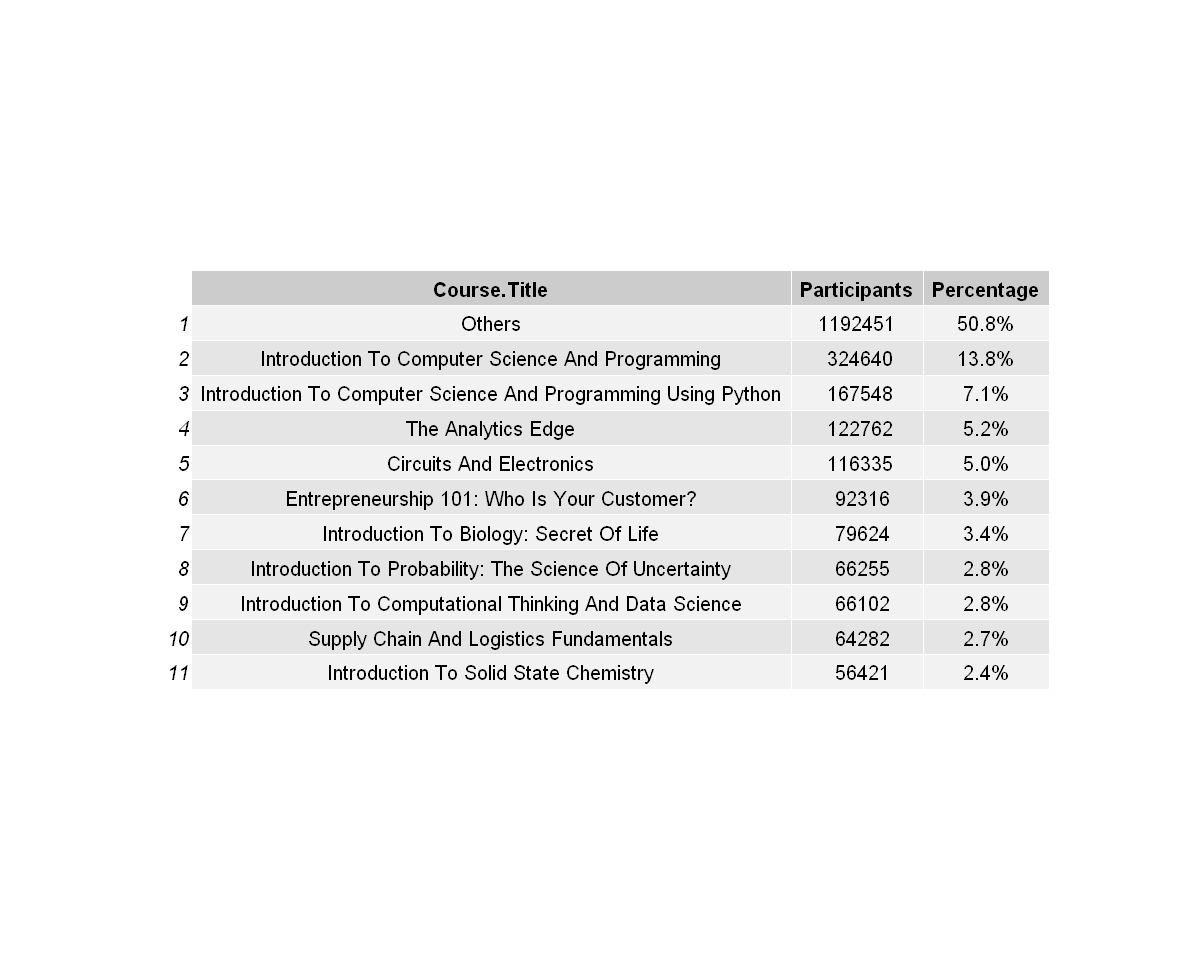

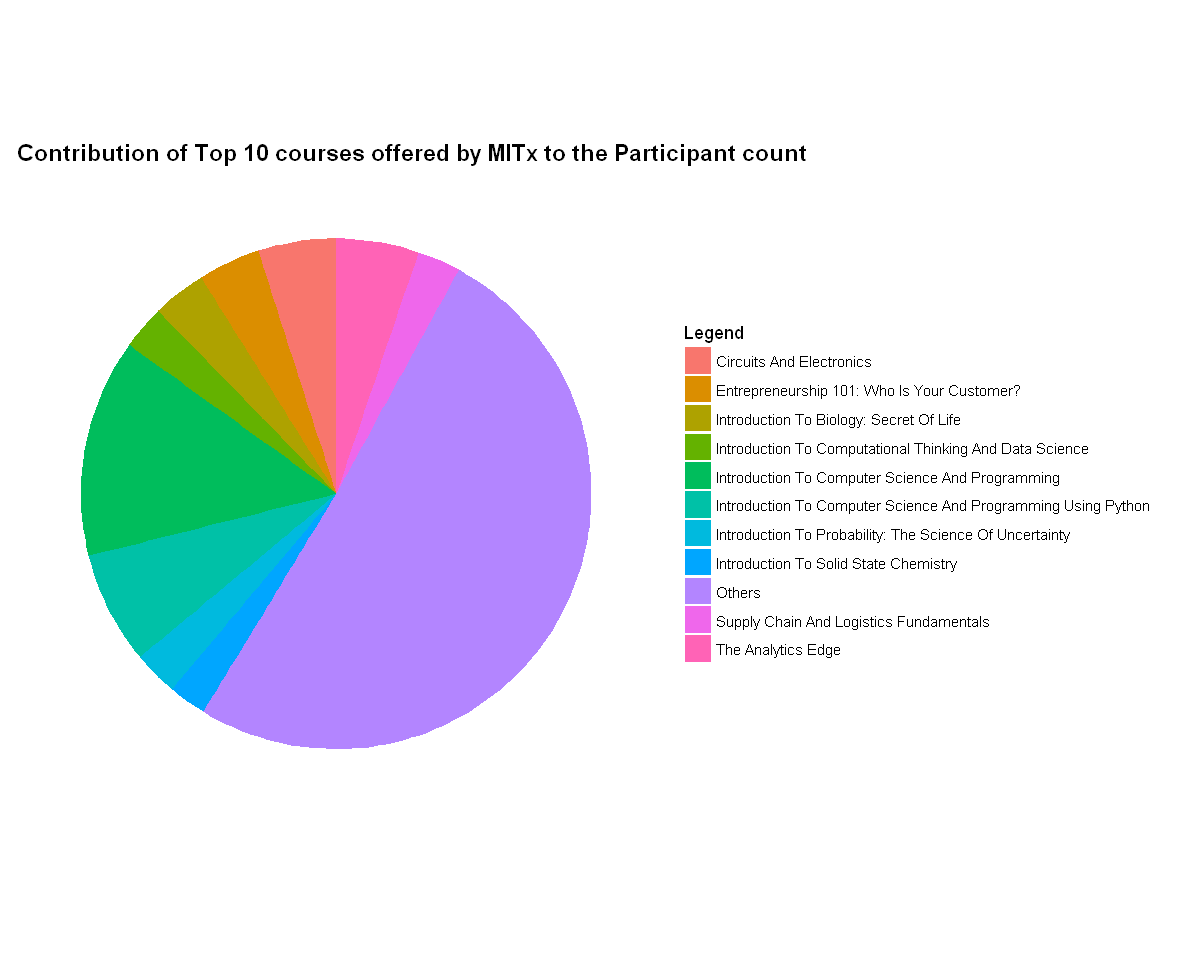

In [14]:
## percentage of occupany by the top 10 courses for each institue--
course <- test_data %>%
  group_by(Course.Title = stringi::stri_trans_totitle(Course.Title))
course <- course %>% group_by(Course.Title,Institution) %>% 
  summarise(Participants= sum(Participants..Course.Content.Accessed.),Passed=sum(Certified)) %>%
  arrange(desc(Participants)) 
#renaming the courses other than top 10 across each institue to others-
course <- course %>% group_by(Institution) %>%
  mutate(ranking=as.integer(rank(desc(Participants))))
course$Course.Title <- ifelse(course$ranking>10, "Others",course$Course.Title)


#MIT-X
print("Number of courses in MITX")
nrow(course %>% filter(Institution=='MITx'))
course1 <- course %>% filter(Institution=='MITx')%>% group_by(Course.Title) %>% 
  summarise(Participants= sum(Participants)) %>%
  arrange(desc(Participants)) %>%
  mutate(Percentage = percent(Participants / sum(Participants)))
# displaying the table
grid.table(course1)


# plot 
# pie chart visualisation-
blank_theme <- theme_minimal()+
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.border = element_blank(),
    panel.grid=element_blank(),
    axis.ticks = element_blank(),
    plot.title=element_text(size=14, face="bold")
  )
ggplot(course1,aes(x="",y=Participants,fill=as.factor(Course.Title)))+
  geom_bar(width=1,stat='identity')+
  coord_polar("y",start=0)+
  blank_theme +
  theme(axis.text.x = element_blank()) +
  scale_fill_discrete(name="Legend") +
  ggtitle("Contribution of Top 10 courses offered by MITx to the Participant count") 

[1] "Number of courses in HarvardX"


[1] 109

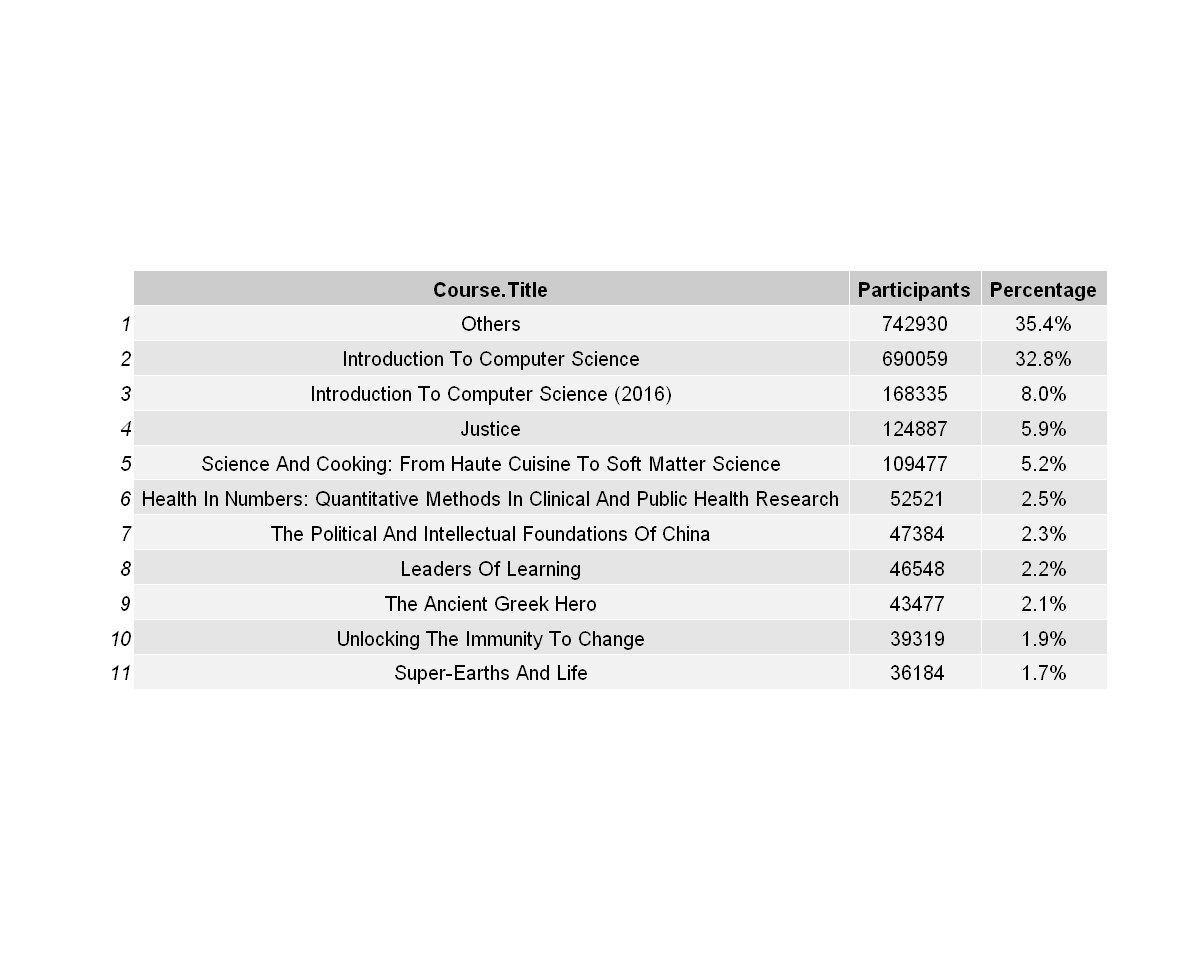

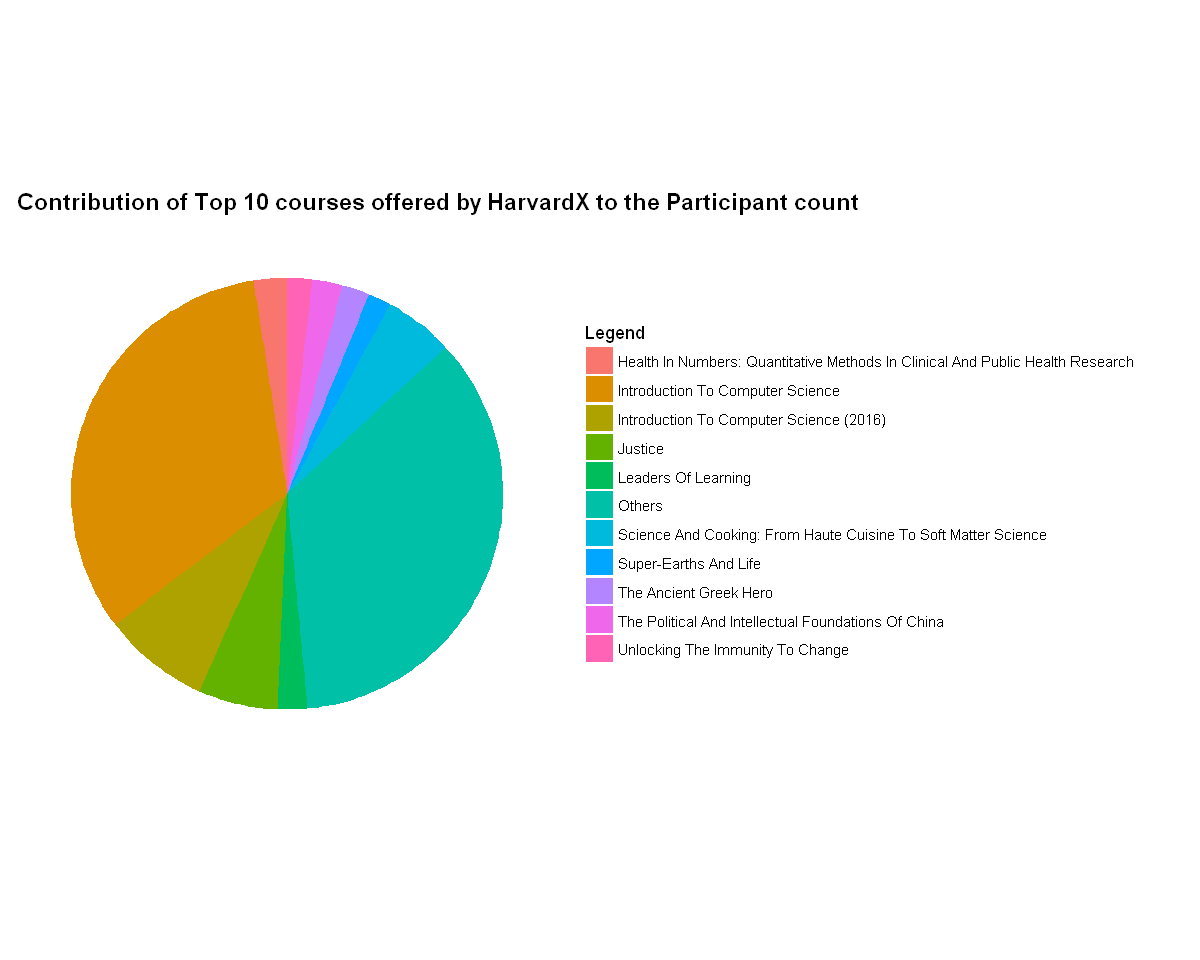

In [15]:
#Harvard-X
print("Number of courses in HarvardX")
nrow(course %>% filter(Institution=='HarvardX'))
course1 <- course %>% filter(Institution=='HarvardX')%>% group_by(Course.Title) %>% 
  summarise(Participants= sum(Participants)) %>%
  arrange(desc(Participants)) %>%
  mutate(Percentage = percent(Participants / sum(Participants)))
# displaying the table
grid.table(course1)


# plot 
# pie chart visualisation-
blank_theme <- theme_minimal()+
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.border = element_blank(),
    panel.grid=element_blank(),
    axis.ticks = element_blank(),
    plot.title=element_text(size=14, face="bold")
  )
ggplot(course1,aes(x="",y=Participants,fill=as.factor(Course.Title)))+
  geom_bar(width=1,stat='identity')+
  coord_polar("y",start=0)+
  blank_theme +
  theme(axis.text.x = element_blank()) +
  scale_fill_discrete(name="Legend") +
  ggtitle("Contribution of Top 10 courses offered by HarvardX to the Participant count")

<div class="alert alert-success">
<font color=blue>
<b>
Insight-
<br>
<br>
1. Even though both the institues offer around ~100 courses, the most popular 10 courses(10%) make up for around half of the
participants(~50%).
<br>
<br>
2. Also,a great number of participants(~ 40% in HarvardX and ~20% in MITX) choose the "Introduction to Computer Science" course.
<br>
</b>
</font>
</div>

## 4. Other Insights:
### 4.a- Gender Imbalance-
Let's have a look at the imbalance of male and female participants.

[1] "Summary of Male percentage:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.24   54.17   66.52   67.01   81.63   93.44 

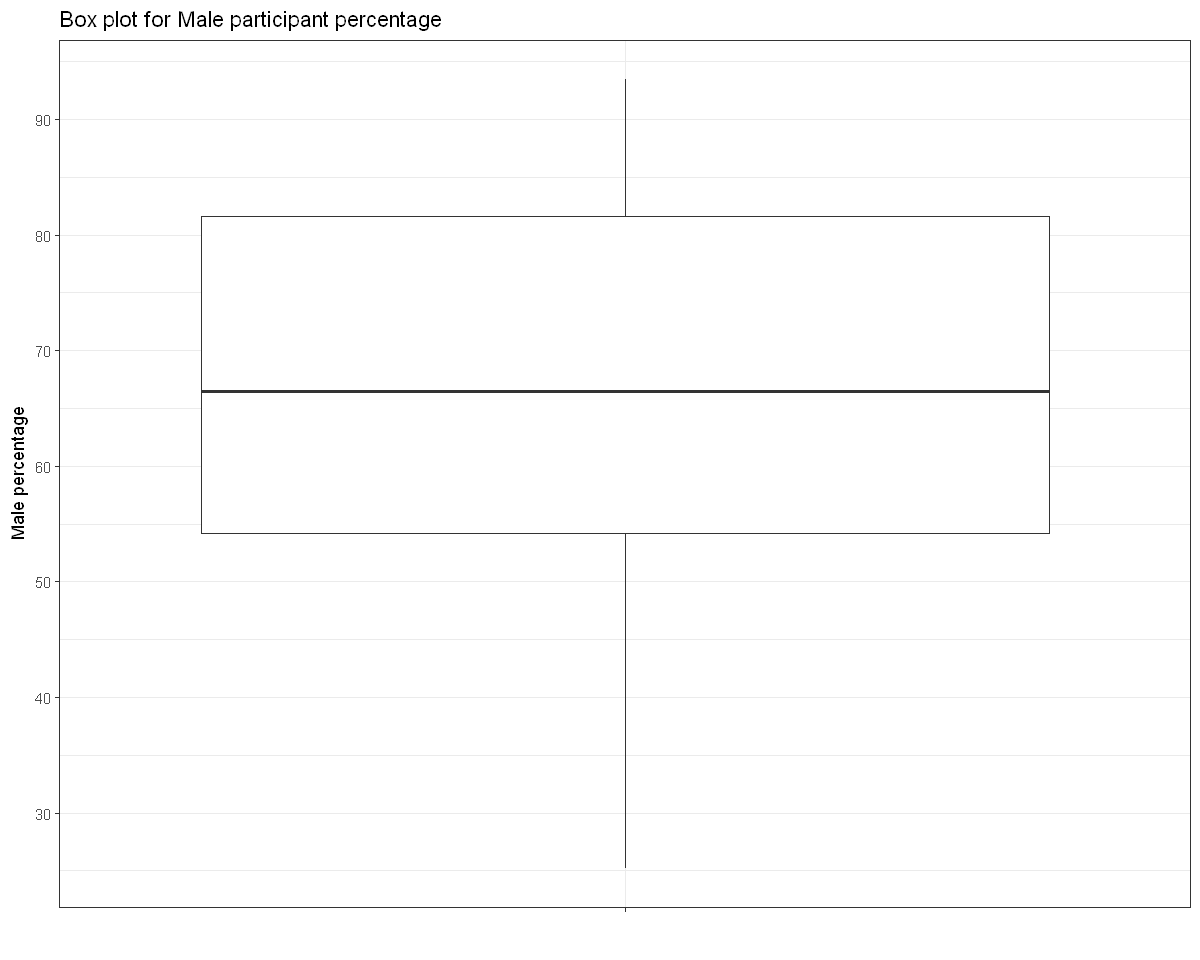

In [16]:
### analysis of male and female percentage:
# male
## printing summaries:
print("Summary of Male percentage:")
summary(test_data$X..Male)
## Whisker plot
ggplot(data = test_data, aes(x = "", y=X..Male )) +
  geom_boxplot() +
  scale_y_continuous(breaks=scales::pretty_breaks(n=10))+
  theme_bw() + 
  xlab("") + 
  ylab("Male percentage")  +
  ggtitle("Box plot for Male participant percentage")

[1] "Summary of Female percentage:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.56   18.37   33.48   32.99   45.83   74.76 

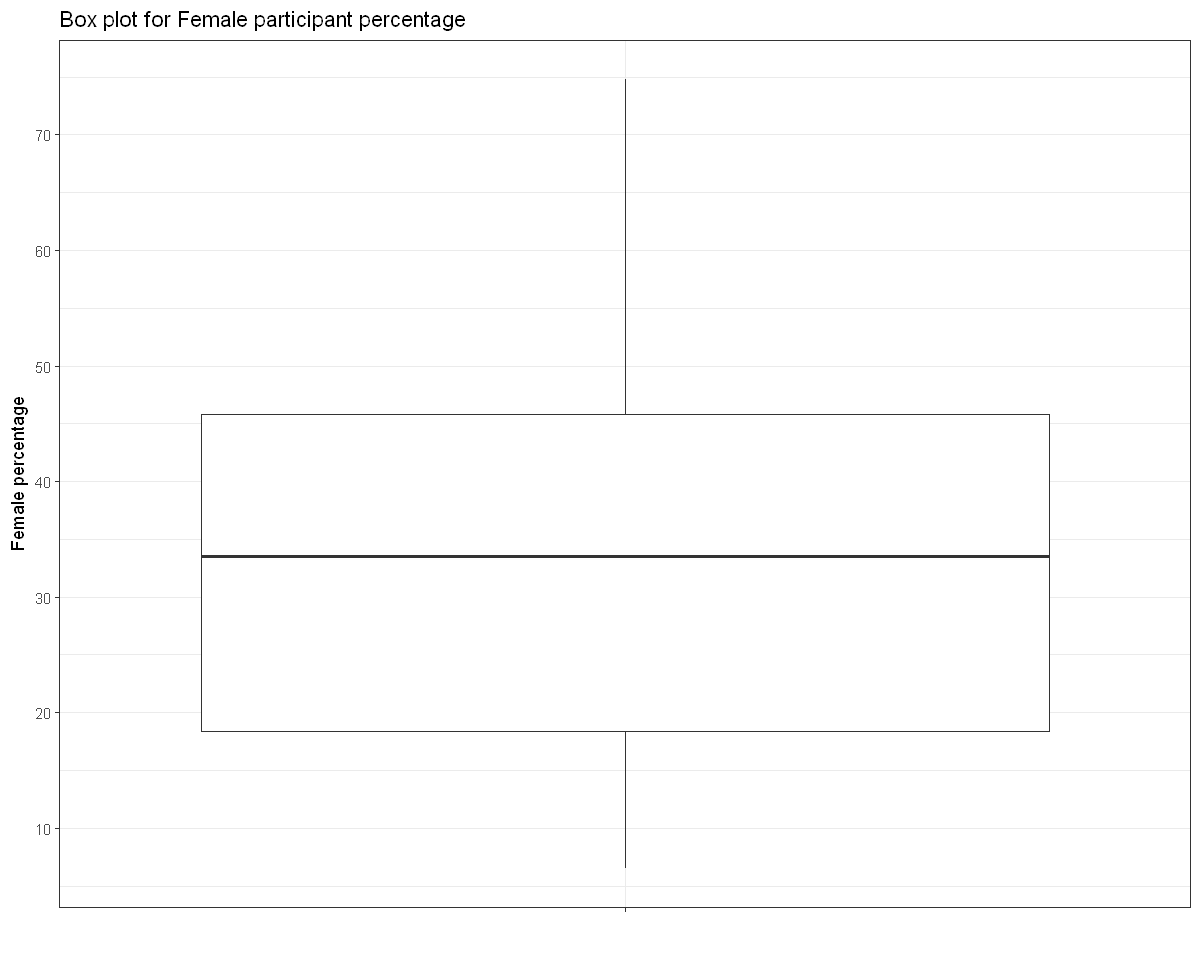

In [17]:
# female 
print("Summary of Female percentage:")
summary(test_data$X..Female)
## Whisker plot
ggplot(data = test_data, aes(x = "", y=X..Female )) +
  geom_boxplot() +
  scale_y_continuous(breaks=scales::pretty_breaks(n=10))+
  theme_bw() + 
  xlab("") + 
  ylab("Female percentage")  +
  ggtitle("Box plot for Female participant percentage")

<div class="alert alert-success">
<font color=blue>
<b>
Insight-
<br>
<br>
There is a heavy male dominance by men in the online courses offred on EdX. Men have a median percentage of 66% with the 3rd quartile at 81% while women lag very behind with a median of 33% with the 3rd quartile only at 45%.
<br>
</b>
</font>
</div>

### 4.b- Certification percentage relationship with course difficulty- 
Generally, if a course takes more time to complete, then it would be considered a difficult course requiring effort. Let us look at the certification rate for difficult courses and easy courses.

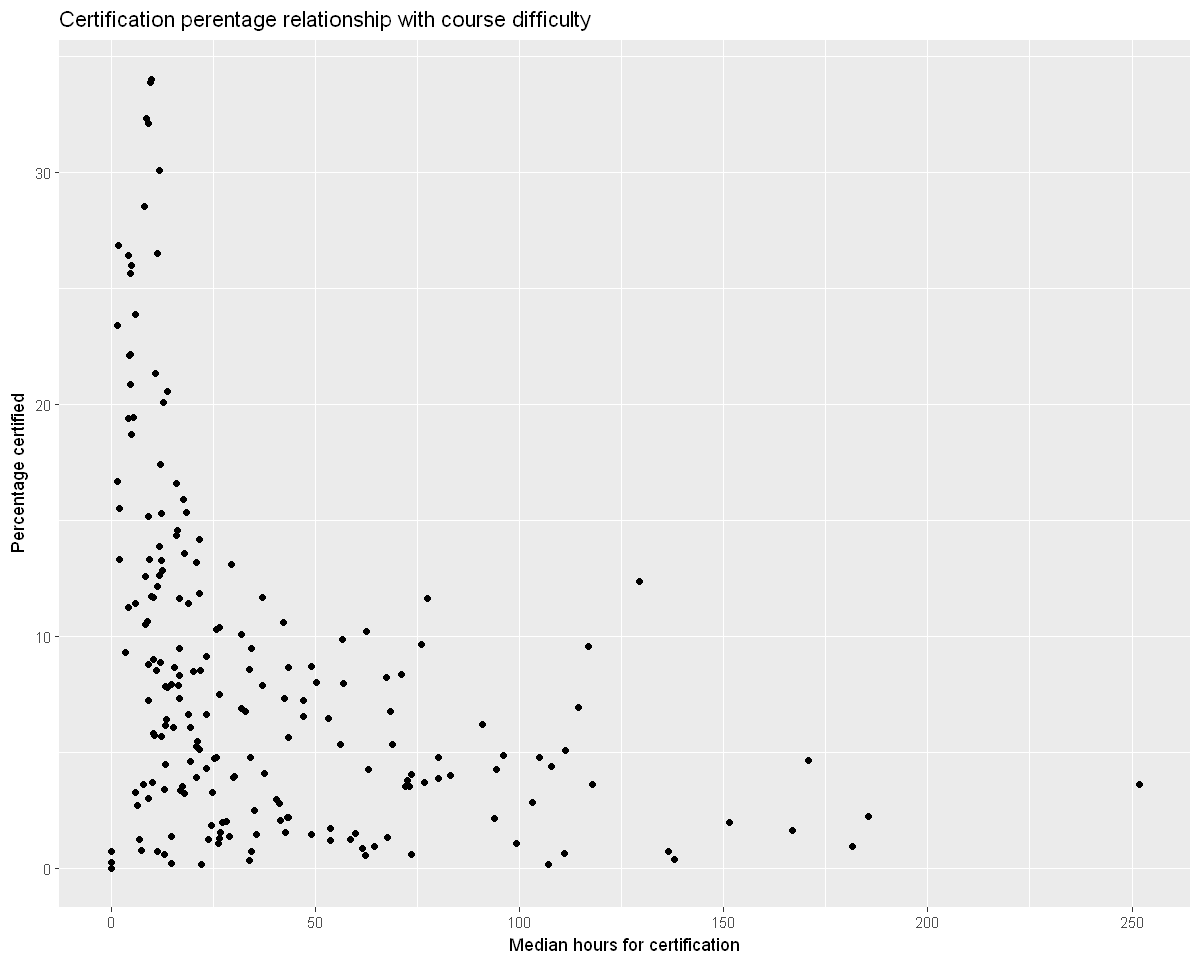

In [18]:
time <- test_data %>% group_by(Course.Title) %>% summarise(cert=mean(X..Certified),hours=mean(Median.Hours.for.Certification))

# plot 
ggplot(data=time, aes(x=hours, y=cert)) +
    geom_point()+
    xlab("Median hours for certification") + 
    ylab("Percentage certified")  +
    ggtitle("Certification perentage relationship with course difficulty")    


<div class="alert alert-success">
<font color=blue>
<b>
Insight-
<br>
<br>
The percentage of participants getting certified gradually comes down as the time taken to complete the course increases.
<br>
</b>
</font>
</div>

### 4.c- Literacy rate vs Certification percentage:
Here, we compare the literacy rate(% Bachelors degree or higher) with the certification percentage


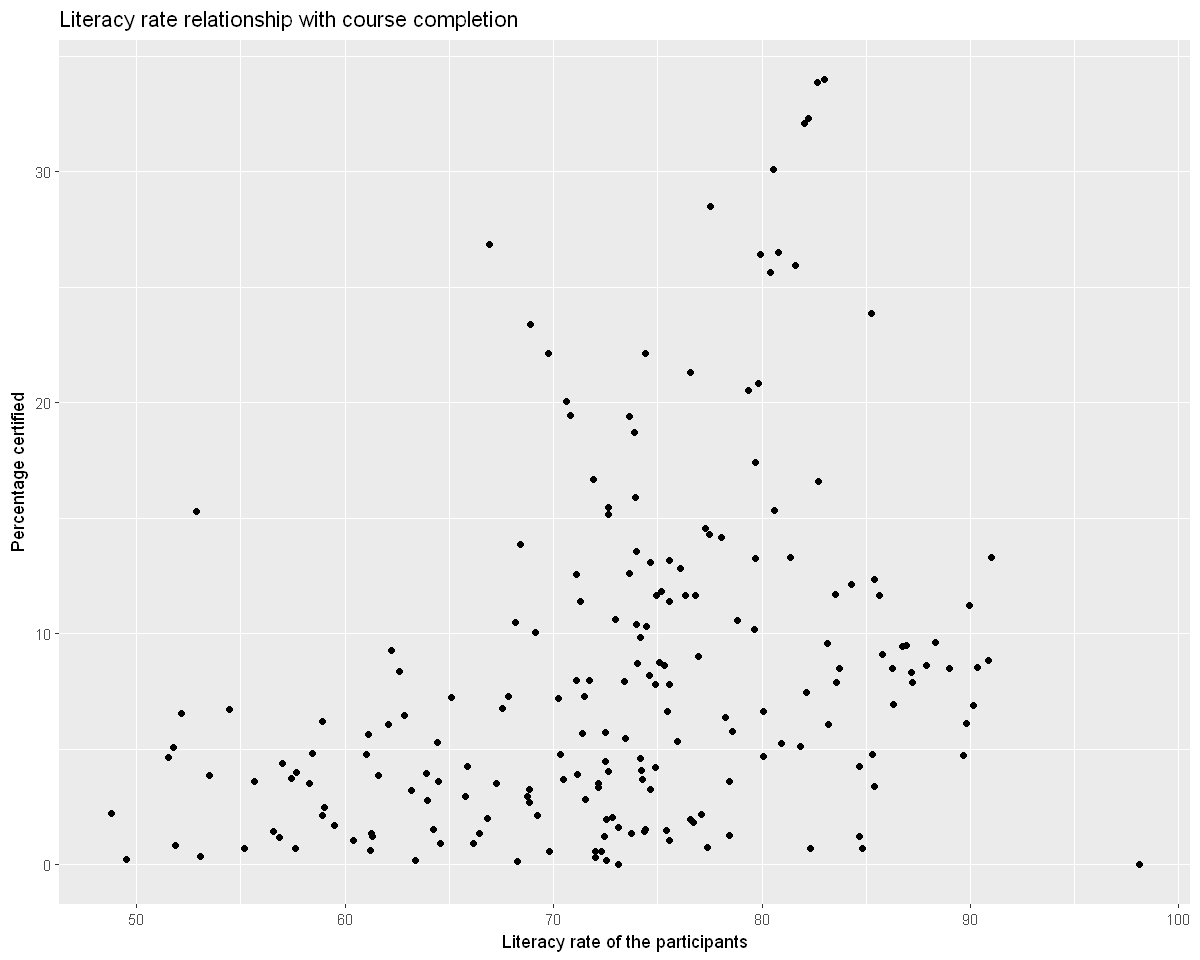

In [19]:
rate <- test_data %>% group_by(Course.Title) %>% summarise(cert=mean(X..Certified),rate=mean(X..Bachelor.s.Degree.or.Higher))

# plot 
ggplot(data=rate, aes(x=rate, y=cert)) +
    geom_point()+
    ylab("Percentage certified") + 
    xlab("Literacy rate of the participants")  +
    ggtitle("Literacy rate relationship with course completion")  

<div class="alert alert-success">
<font color=blue>
<b>
Insight-
<br>
<br>
Courses that have highly literate participants have a higher chance of getting higher certification percentages.
<br>
</b>
</font>
</div>


### 4.d- Certification percentage over time
Here, we look at how the certification percentage of participants get affected over different years

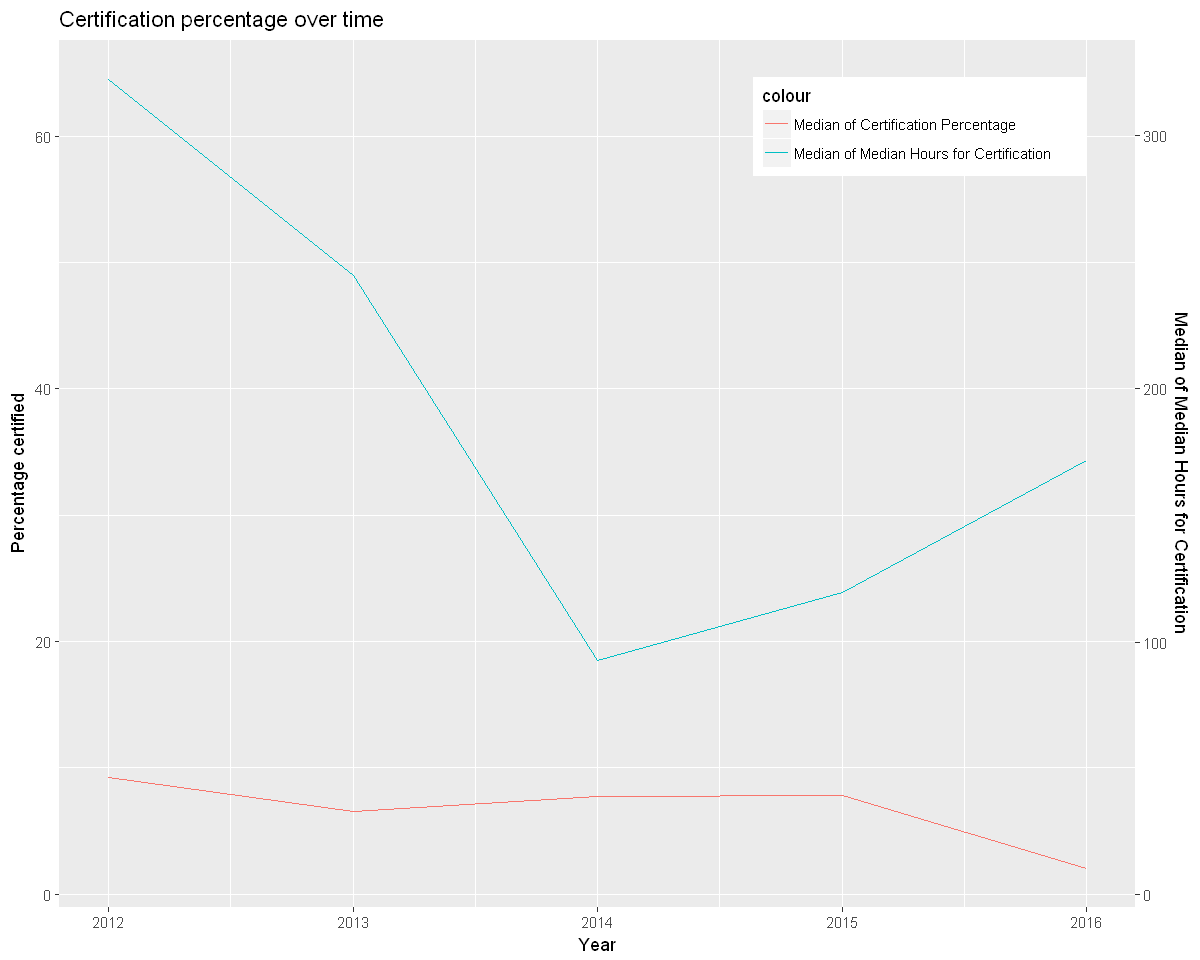

In [20]:
### getting year from the "launch Date" column:
test_data$year <- year(as.Date(test_data$Launch.Date,format = "%m/%d/%Y"))

time <- test_data %>% group_by(year) %>% summarise(cert=median(X..Certified),dif=median(Median.Hours.for.Certification))

# plot 
p <- ggplot(time,aes(x=year))
p <- p + geom_line(aes(y=cert,color='Median of Certification Percentage'))
p <- p+ geom_line(aes(y=dif,color='Median of Median Hours for Certification'))
p <- p + scale_y_continuous(sec.axis = sec_axis(~.*5, name = "Median of Median Hours for Certification"))
p <-  p + theme(legend.position = c(0.8, 0.9))
p+  ylab("Percentage certified") + 
    xlab("Year")  +
    ggtitle("Certification percentage over time")

<div class="alert alert-success">
<font color=blue>
<b>
Insight-
<br>
<br>
1. Even though the hours for completion reduced in 2013,2014, the certification percentage only went down.Also, the year 2012 with the highest hours for completion had the highest certificatio percentage. In 2016 when the hours for completion rised back up, the certificate percentage went even lower.
<br>
<br>
2. This might mean that more number of people as the years are progressing, are not inclined to complete the courses they enroll in, no matter the difficulty of the course.
<br>
</b>
</font>
</div>